Header for assignment 4.

This is where libraries are imported and general settings are maintained.

Submission for Kris Jensen

In [428]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier

#%matplotlib qt
np.random.seed(seed = 25)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

verbose = False

This is support code provded by Dr. Loveland for the assignment. 

The cell below here will generate a random sampling of 10 data points for each of two classes.

In [429]:
# create 2 gaussians

normal1_mean = [-2, -2]
normal1_cov = [[1, 0], [0, 1]]
num_normal1_samples = 10
normal1 = np.random.multivariate_normal(mean=normal1_mean, cov=normal1_cov, size=num_normal1_samples)

normal2_mean = [2,2]
normal2_cov = [[1, 0], [0, 1]]
num_normal2_samples = 10
normal2 = np.random.multivariate_normal(mean=normal2_mean, cov=normal2_cov, size=num_normal2_samples)


The randomly generated data for clustering will be combined into a single X variable.

The labels will be stored in y.

This is the ground truth for the assignment.

In [430]:
# create a fully labeled dataset (for Part I)
X = np.concatenate((normal1,normal2),axis = 0)

if verbose == True: 
    print(X.shape)
    print(X)

y = np.array(num_normal1_samples*[1])
y = np.concatenate((y,np.array(num_normal2_samples*[2])))

if verbose == True: 
    print(y.shape)
    print(y)

From the ground truth data, a set of labelled data will be selected.

This labelled set will contain one data point for each cluster, class.

In [431]:
num_labeled_pts_per_cluster = 1
# create labeled y array
y_L = np.array(num_labeled_pts_per_cluster*[1])
y_L = np.concatenate((y_L,np.array(num_labeled_pts_per_cluster*[2])),axis = 0)
if verbose == True: print(y_L)

# create labeled X array
# select points from each gaussian to be labeled points
rng = np.random.default_rng()
rand_inds_1 = rng.choice(num_normal1_samples, num_labeled_pts_per_cluster, replace=False)
X_L = normal1[rand_inds_1,:]
rand_inds_2 = rng.choice(num_normal2_samples, num_labeled_pts_per_cluster, replace=False)
X_L = np.concatenate((X_L,normal2[rand_inds_2,:]))
if verbose == True: print(X_L)

# create unlabeled array
X_U = normal1.copy()
X_U = np.delete(X_U,rand_inds_1,axis = 0)
X_temp = normal2.copy()
X_temp = np.delete(X_temp,rand_inds_2,axis = 0)
X_U = np.concatenate((X_U,X_temp),axis = 0)
if verbose == True: print(X_U.shape)

This printout was created to aid in debugging.

In [432]:
if verbose == True: 
    print(f'{X=}')
    print(f'{X_L=}')
    print(f'{X_U=}')

Plot the original data

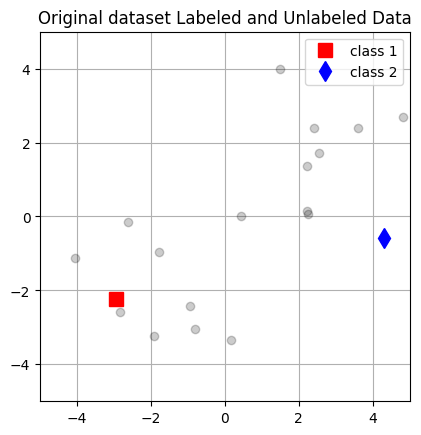

In [433]:
fig, axs = plt.subplots(1,1)

# plt.figure()
plt.plot(X_U[:,0],X_U[:,1],'ko',alpha = 0.2)

c_inds = np.where(y_L == 1)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'rs',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y_L == 2)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'bd',label = f'class {str(2)}',markersize = 10)

axs.set(xlim=(-5, 5), ylim=(-5, 5))
axs.set_aspect('equal', 'box')
plt.title('Original dataset Labeled and Unlabeled Data')
plt.grid()
plt.legend()

Generate a classifier using scikit-learn. The classified I settled on is the RandomForest Classifier. 

The first part of this assignment will be to classify the dataset using the ground truth data.

This section of code has the following control flow:  
1) Generate classifier  
2) Call fit using ground truth data: X, y  
3) Plot DecisionBoundary using scikit-learn inspection library  
4) Add datapoints from X to the plot  
5) Generate a second plot with data points color coded to classes  

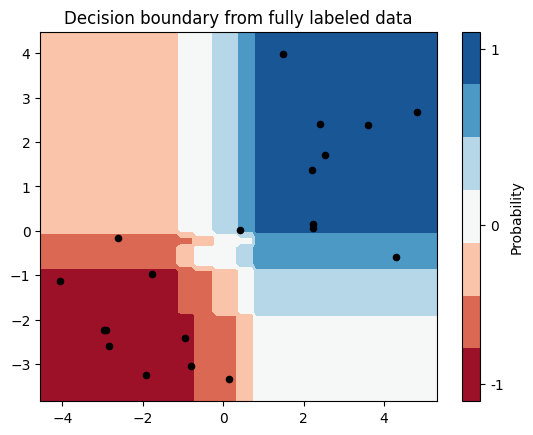

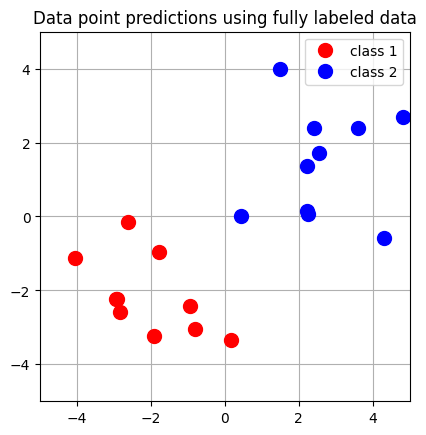

In [441]:
# Part I - Find classifier using fully labeled data (i.e. X,y)
classifier_A = RandomForestClassifier( max_depth=5, n_estimators=10, max_features=1, random_state=42 )          
classifier_A.fit(X, y)
fig, ax = plt.subplots(1,1)

display = DecisionBoundaryDisplay.from_estimator(classifier_A, X, cmap=cm, ax=ax, eps=0.5)
ax.title.set_text('Decision boundary from fully labeled data')
cbar = fig.colorbar(ax.get_children()[0], ax=ax)
cbar.set_label('Probability')
cbar.set_ticks([0.05, 0.5, 1])
cbar.set_ticklabels(['-1', '0', '1'])
#plot the labeled points
pred_A = classifier_A.predict(X)
pred_A_probs = classifier_A.predict_proba(X)

if verbose == True: 
    print(f'{pred_A=}')
    print(f'{pred_A_probs=}')


ax.scatter(X[:,0], X[:, 1], c='k', s=20, edgecolors='k')

plt.show()

#make a plot without the descision boundary, instead plotting the datapoints by class
fig, ax = plt.subplots(1,1)
c_inds = np.where(y == 1)[0]
ax.plot(X[c_inds,0],X[c_inds,1],'ro',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y == 2)[0]
ax.plot(X[c_inds,0],X[c_inds,1],'bo',label = f'class {str(2)}',markersize = 10)
ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.set_aspect('equal', 'box')
plt.grid()
plt.legend()
ax.title.set_text('Data point predictions using fully labeled data')
plt.show()

Generate a classifier using scikit-learn. The classified I settled on is the RandomForest Classifier. 

The second part of this assignment will be to classify the dataset using the single-point per class labelled dataset.

This section of code has the following control flow:  
1) Generate classifier  
2) Call fit using subset of data data: X_L, y_L  
3) Plot DecisionBoundary using scikit-learn inspection library  
4) Add datapoints from X to the plot  
5) Generate a second plot with data points color coded to classes  

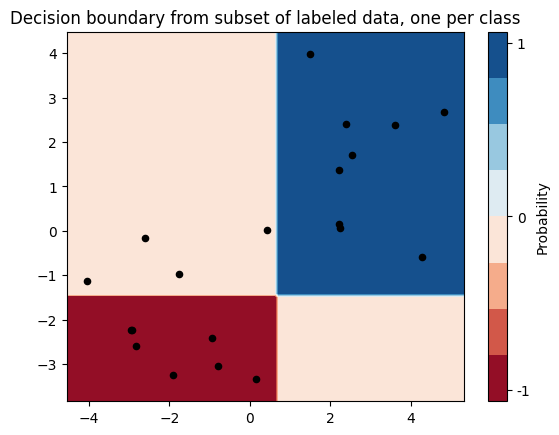

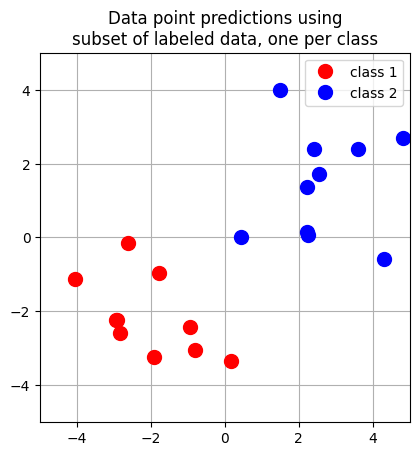

In [463]:
# Part II - Find classifier using subset of labeled data (i.e. just X_L,y_L)
classifier_L = RandomForestClassifier( max_depth=5, n_estimators=10, max_features=2, random_state=42 )
classifier_L.fit(X_L, y_L)
fig, ax = plt.subplots(1,1)

display = DecisionBoundaryDisplay.from_estimator(classifier_L, X, cmap=cm, ax=ax, eps=0.5)
cbar = fig.colorbar(ax.get_children()[0], ax=ax)
cbar.set_label('Probability')
cbar.set_ticks([0.1, 0.4, 0.7])
cbar.set_ticklabels(['-1', '0', '1'])
ax.title.set_text('Decision boundary from subset of labeled data, one per class')
#plot the labeled points
pred_L = classifier_A.predict(X)
pred_L_probs = classifier_A.predict_proba(X)
if verbose == True: 
    print(f'{pred_L=}')
    print(f'{pred_L_probs=}')


ax.scatter(X[:,0], X[:, 1], c='k', s=20, edgecolors='k')
plt.show()

#make a plot without the descision boundary, instead plotting the datapoints by class
fig, ax = plt.subplots(1,1)
c_inds = np.where(y == 1)[0]
ax.plot(X[c_inds,0],X[c_inds,1],'ro',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y == 2)[0]
ax.plot(X[c_inds,0],X[c_inds,1],'bo',label = f'class {str(2)}',markersize = 10)
ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.set_aspect('equal', 'box')
ax.title.set_text('Data point predictions using\nsubset of labeled data, one per class')
plt.grid()
plt.legend()
plt.show()

Generate a classifier using scikit-learn. The classified I settled on is the RandomForest Classifier. 

The third part of this assignment will be to classify the dataser using a wrapper method starting with the two-point dataset.

This section of code has the following control flow:  
1) Generate classifier  
1) Create a list for psuedo labeling
1) Add first two data points and labels to psuedo set
1) Start with a high probability threshold, 0.9
1) Call `fit()` using data: X_L, y_L
1) Predict membership of each point in the dataset, X_U, against the initial fit
1) If datapoint probability exceeds threshold  
*      Add psuedolabel and datapoint to tracked points
*      Delete point from master list of points
8) Run `fit()` on new dataset
1) Adjust probability threshold for next iteration
1) plot data for this iteration
1) check stopping condition


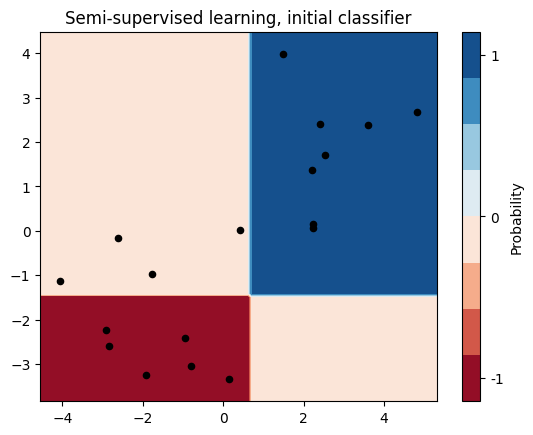

[[0.6 0.4]
 [0.9 0.1]
 [0.6 0.4]
 [0.6 0.4]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.3 0.7]
 [0.6 0.4]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]]


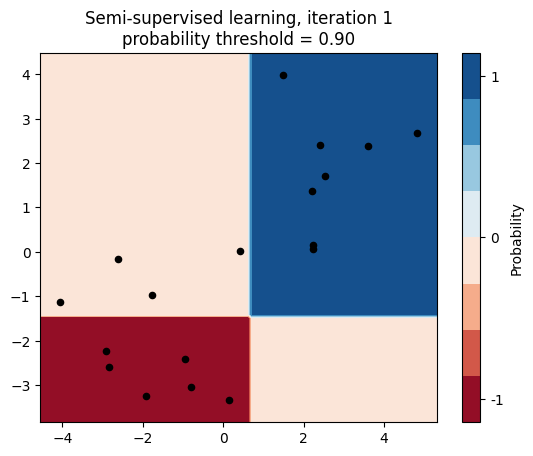

[[0.6 0.4]
 [0.9 0.1]
 [0.6 0.4]
 [0.6 0.4]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.3 0.7]
 [0.6 0.4]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]]


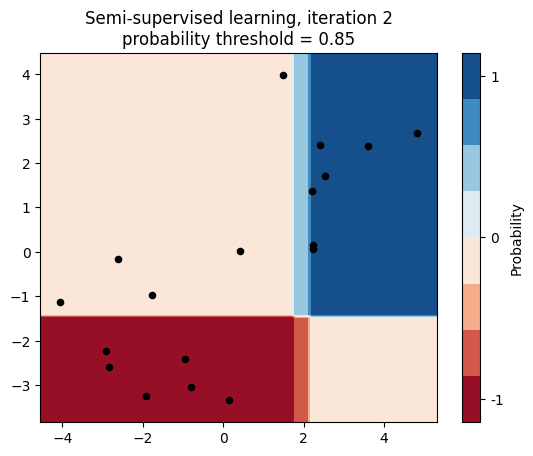

[[0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.2 0.8]
 [0.6 0.4]
 [0.2 0.8]
 [0.6 0.4]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.4 0.6]
 [0.2 0.8]]


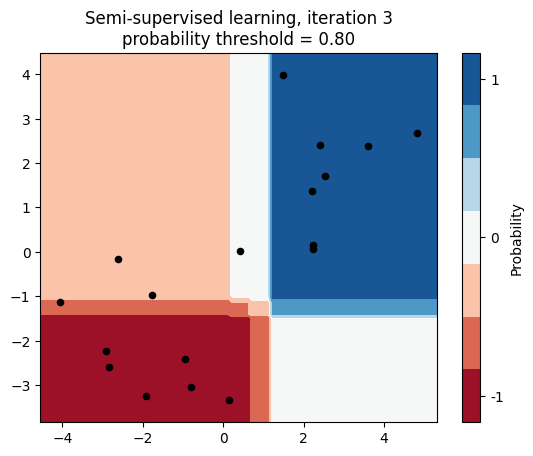

[[0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.5 0.5]
 [0.  1. ]
 [0.  1. ]]


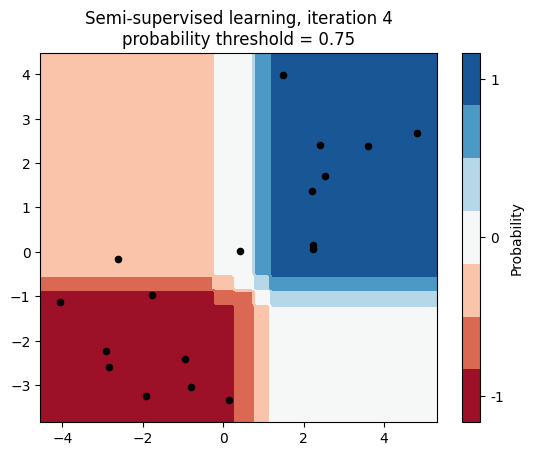

[[0.9 0.1]
 [0.6 0.4]
 [0.4 0.6]]


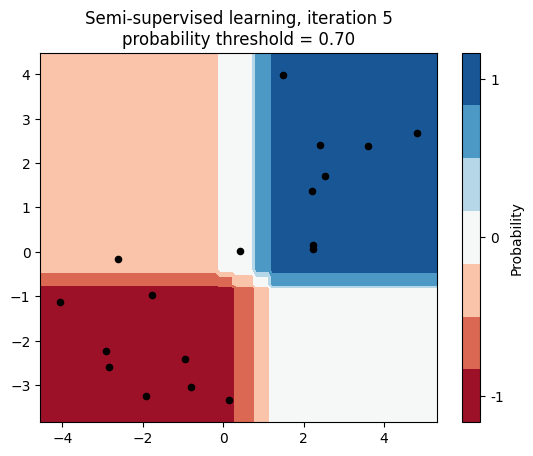

[[0.6 0.4]
 [0.4 0.6]]


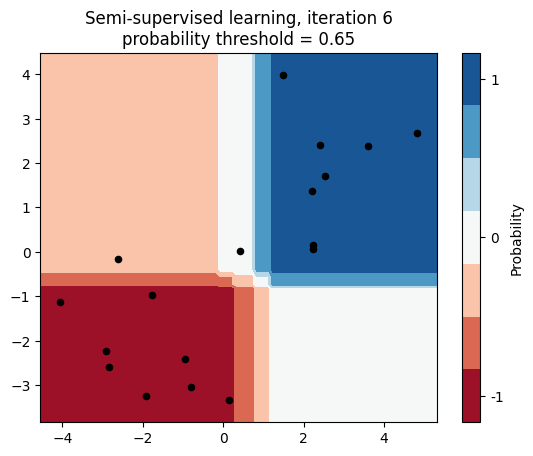

[[0.6 0.4]
 [0.4 0.6]]


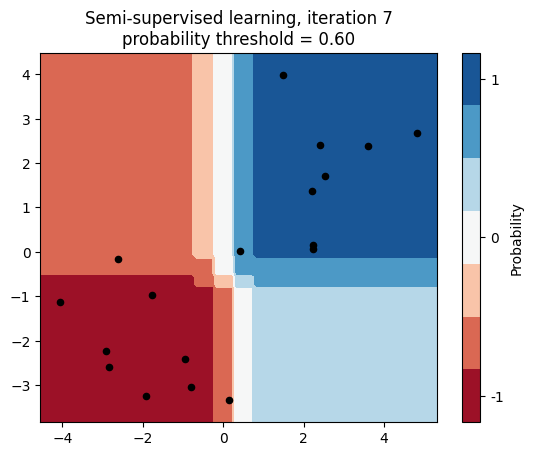

In [469]:
# Part III - Find classifier using semi-supervised wrapper method (i.e. X_L,y_L, and X_U)
#data for threshold reduction loop
start_probability_threshold = 0.9
end_probability_threshold = 0.51
probability_threshold_step = 0.05
probability_threshold = start_probability_threshold

#data for classifier, the wrapper loop will destroy the original data
y_pseudoL = np.copy(y_L )
X_pseudoL = np.copy(X_L)
U_pseudoL = np.copy(X_U)
U_to_delete = []

def make_plot(XpL, ypL, X, classifier, ax, cm, title):
    #plot the labeled points
    display = DecisionBoundaryDisplay.from_estimator(classifier, X, cmap=cm, ax=ax, eps=0.5)
    pred_PL_probs = classifier.predict_proba(X)
    cbar = fig.colorbar(ax.get_children()[0], ax=ax)
    cbar.set_label('Probability')
    cbar.set_ticks([np.amin(display.surface_.cvalues), (np.amin(display.surface_.cvalues)+ np.amax(display.surface_.cvalues))/2, np.amax(display.surface_.cvalues)])
    cbar.set_ticklabels(['-1', '0', '1'])
    if verbose == True:
        pred_PL = classifier.predict(X)
        
        print(f'{pred_PL=}')
        print(f'{pred_PL_probs=}')
    ax.scatter(X[:,0], X[:, 1], c='k', s=20, edgecolors='k')    
    ax.set_title(title)

classifier_PL = RandomForestClassifier( max_depth=5, n_estimators=10, max_features=2, random_state=42 )
classifier_PL.fit(X_pseudoL, y_pseudoL)
fig, ax = plt.subplots(1,1)
ax = plt.subplot()

make_plot(X_pseudoL, y_pseudoL, U_pseudoL, classifier_PL, ax, cm, 'Semi-supervised learning, initial classifier')
plt.show()

#loop until no more points are added to the psuedo labeled set

opportunity_to_label_more_points = True
j=0
#stopping condition is met when the number of points in the pseudo labeled set is greater than the number of points in the unlabeled set or there are no more opportunities to label points
while len(X_U) >= len(X_pseudoL) and opportunity_to_label_more_points == True:
    
    prob = classifier_PL.predict_proba(U_pseudoL)
    print(prob)
    if np.amax(prob) > probability_threshold:
        for i in range(len(prob)):
            if prob[i][np.argmax(prob[i])] >= probability_threshold:        
                y_pseudoL = np.concatenate((y_pseudoL, [np.argmax(prob[i])+1]))
                X_pseudoL = np.concatenate((X_pseudoL, [U_pseudoL[i]]))        
                U_to_delete = np.concatenate((U_to_delete, np.array([i]) ) )           
        classifier_PL.fit(X_pseudoL, y_pseudoL)    
        U_pseudoL = np.delete(U_pseudoL, U_to_delete.astype(int), axis=0)           #delete the points from the unlabeled set, but must be done here to avoid changing the indices
        U_to_delete = []
        
   
    

    #plots
    fig, axs = plt.subplots(1,1)
    ax = plt.subplot()
    cm = plt.cm.RdBu
    make_plot(X_pseudoL, y_pseudoL, X_U, classifier_PL, ax, cm, f'Semi-supervised learning, iteration {j+1}\nprobability threshold = {probability_threshold:.2f}')
    plt.show()
    j+=1
    #adjust the probability threshold
    probability_threshold = np.max([probability_threshold - probability_threshold_step, end_probability_threshold])
    if verbose == True: print(f'probability_threshold = {probability_threshold}')
    
    if(probability_threshold <= end_probability_threshold):
        opportunity_to_label_more_points = False
        if verbose == True: print('No more points to label')
plt.show()


Debug cell

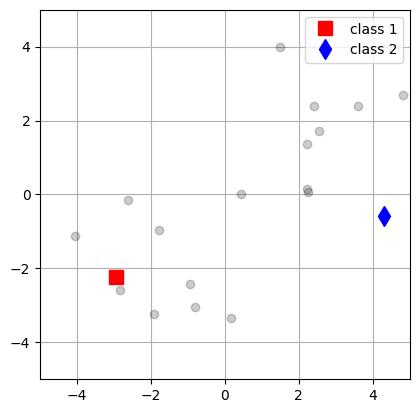

In [437]:
fig, axs = plt.subplots(1,1)

# plt.figure()
plt.plot(X_U[:,0],X_U[:,1],'ko',alpha = 0.2)

c_inds = np.where(y_L == 1)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'rs',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y_L == 2)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'bd',label = f'class {str(2)}',markersize = 10)

axs.set(xlim=(-5, 5), ylim=(-5, 5))
axs.set_aspect('equal', 'box')

plt.grid()
plt.legend()

Plot all classifier methods on the same plot

Include a colorbar which describes the probability of class membership.

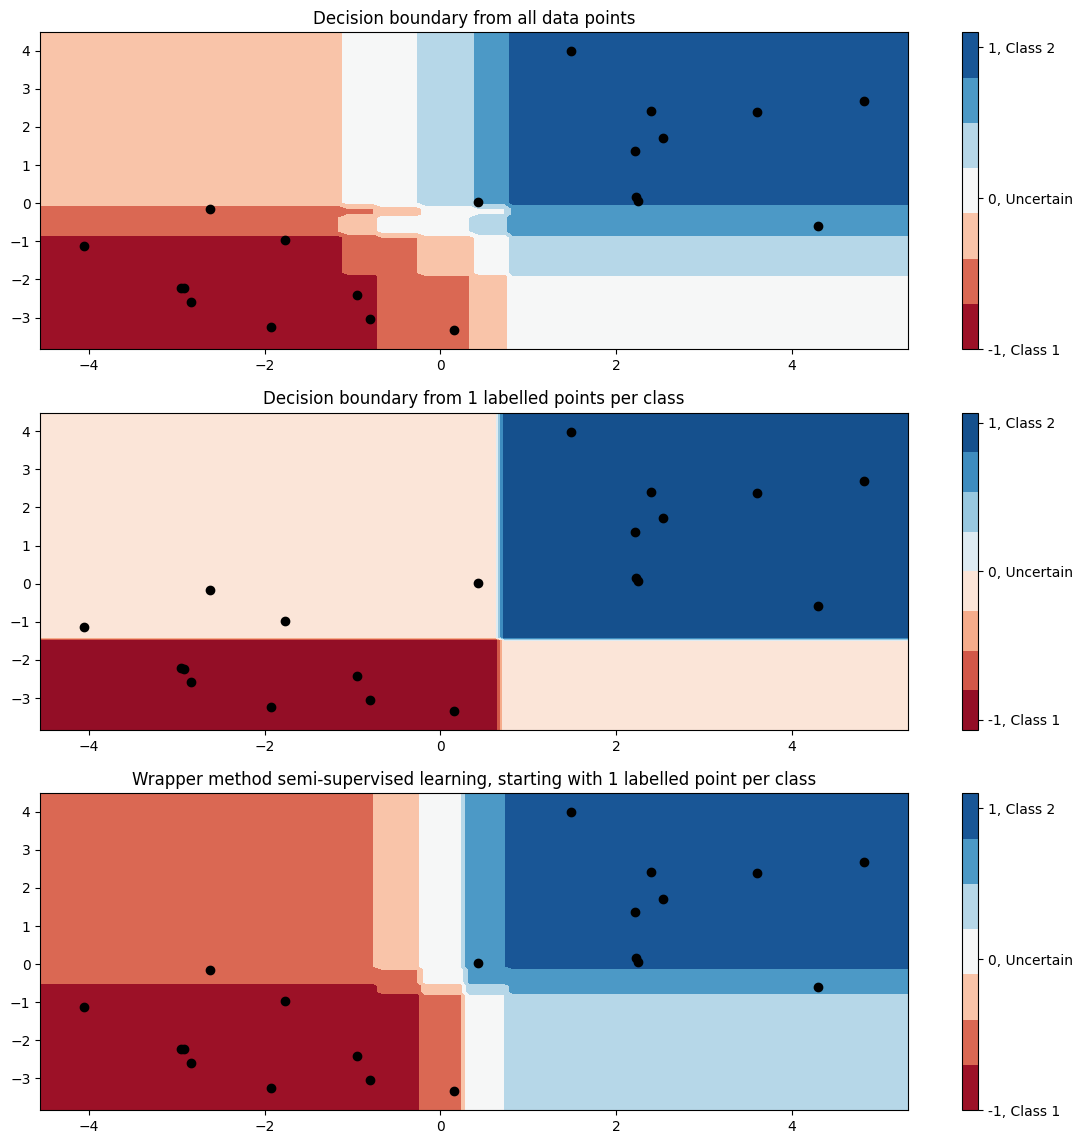

In [438]:
import matplotlib.ticker as mticker
# Show the classifier boundaries for all of these on a single plot
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 14), nrows=3)

display = DecisionBoundaryDisplay.from_estimator(classifier_A, X, cmap=cm, ax=ax1, eps=0.5)
ax1.title.set_text('Decision boundary from all data points')
ax1.plot(X[:,0],X[:,1], 'ko')

display = DecisionBoundaryDisplay.from_estimator(classifier_L, X, cmap=cm, ax=ax2, eps=0.5)
ax2.title.set_text('Decision boundary from 1 labelled points per class')
ax2.plot(X[:,0],X[:,1], 'ko')

display = DecisionBoundaryDisplay.from_estimator(classifier_PL, X, cmap=cm, ax=ax3, eps=0.5)
ax3.title.set_text('Wrapper method semi-supervised learning, starting with 1 labelled point per class')
ax3.plot(X[:,0],X[:,1], 'ko')

cbar1 = fig.colorbar(ax1.get_children()[0], ax=ax1, orientation='vertical')
cbar1.set_ticks([0, 0.5, 1], labels=['-1, Class 1', '0, Uncertain', '1, Class 2'])
cbar2 = fig.colorbar(ax2.get_children()[0], ax=ax2, orientation='vertical')
cbar2.set_ticks([0.1, 0.4, 0.7], labels=['-1, Class 1', '0, Uncertain', '1, Class 2'])
cbar3 = fig.colorbar(ax3.get_children()[0], ax=ax3, orientation='vertical')
cbar3.set_ticks([0, 0.5, 1], labels=['-1, Class 1', '0, Uncertain', '1, Class 2'])

plt.show()
